## Examples of using Transformation class

Author: Dimitris Giovanis, Michael Shields

Date: 12/4/2018

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Correlate, Decorrelate, Nataf, InvNataf
import numpy as np
import matplotlib.pyplot as plt

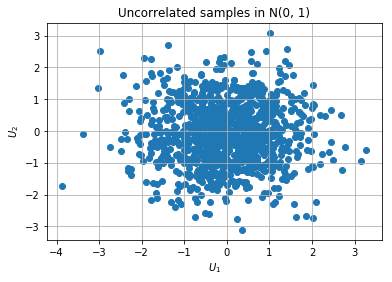

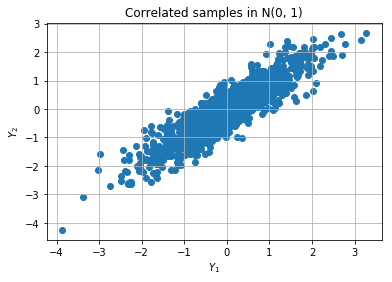

Caution: The samples provided must be uncorrelated standard normal random variables.


In [2]:
# Example 1: 
#In this example, the class 'Correlate' is employed to correlate standard normal samples 
#generated with the UQpy MCS class. 

# Generate uncorrelated standard normal samples using MCS class
x = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

# Correlate the samples according to the following correlation matrix
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
y = Correlate(x, corr_norm=Rho)

plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y.samples[:, 0], y.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

# When samples are provided as an array
x_a = x.samples
y0 = Correlate(x_a, corr_norm=Rho, dimension=2)

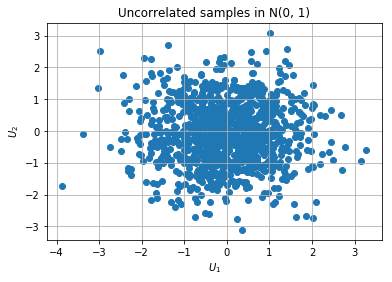

In [3]:
# Example 2: 
#In this example, the class 'Decorrelate' is employed to decorrelate the correlated standard normal samples 
#generated in the previous example. 

# Decorrelate standard normal samples using MCS class
q = Decorrelate(y, corr_norm=Rho)


# Plot the uncorrelated samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(q.samples[:, 0], q.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()


UQpy: Computing Nataf correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[ 1.          0.31649732]
 [ 0.31649732  1.        ]]


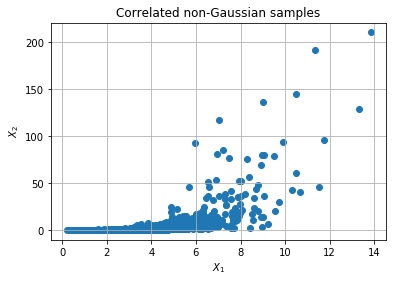

In [4]:
# Example 3: 
#In this example, the class 'InvNataf' is employed to transform the correlated standard normal samples 
#generated in example 1 to  correlated non-Gaussian samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=y, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Correlated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.31568159453964389]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.042165228739204939]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141937]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0027558823676535299]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.00071214991018266798]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy

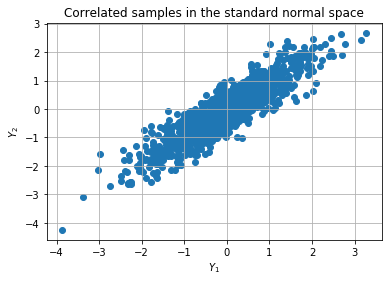

In [5]:
# Example 4:
# In this example, the class 'Nataf' is employed to transform the correlated non-Gaussian samples of example 3 
#back to standard normal samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[ 1.          0.31649732]
 [ 0.31649732  1.        ]]


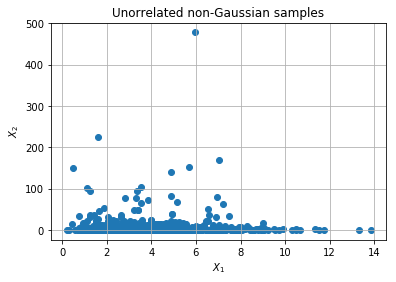

In [6]:
# Example 5:
# Similar to example 3 but with uncorrelated samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=x, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Unorrelated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.31568159453964389]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.042165228739204939]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141937]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0027558823676535299]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.00071214991018266798]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy

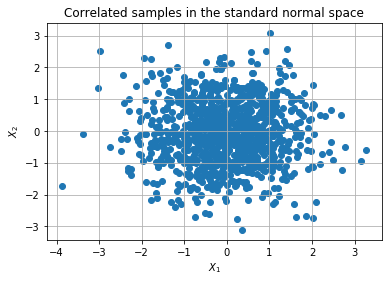

In [ ]:
# Example 6:
# Similar to example 4 but with uncorrelated samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
# Example 7:
# Performs the Iterative Translation Approximation Method (ITAM) to estimate the underlying Gaussian 
# correlation from known values of the correlation for lognormal random variables.
# For a range of correlation values from -0.999 to 0.999, estimate the underlying Gaussian correlation 
#that most closely approximates yields the corresponding correlation for Lognormal(0,1) random variables.

w3 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(corr=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 4], [2, 0.0, 4]], itam_error2=0.001)
    w3[i] = ww.corr_norm[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3868990608879199]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3868980914480282]
UQpy: ITAM Done.
0
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3586834431005965]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3586618463131934]
UQpy: ITAM Done.
1
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3304711840346348]
UQpy: Computing Nataf correlation distortion.

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.82201549984628086]
UQpy: ITAM Done.
20
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.79563714994746149]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.79415885364082017]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.79377407104501052]
UQpy: ITAM Done.
21
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.76759740246690267]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.76594855759389024]
UQpy: Comput

In [ ]:
# Example 8:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

w4 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = InvNataf(corr_norm=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 1], [4, 0.0, 1]], dimension=2)
    w4[i] = ww.corr[0, 1]
    print(i)

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()